# Vizualized model

`ABSESpy` provides a basic visualization of the model. The visualization is based on the `matplotlib`, `xarray`, `geopandas`, and `networkx` library. The visualization is not perfect, but it can help to understand the model structure.

## Grid world

In [1]:
import abses

model = abses.main.MainModel()
module = model.nature.create_module(how="from_resolution", shape=(20, 30))

<Axes: xlabel='test', ylabel='Count'>

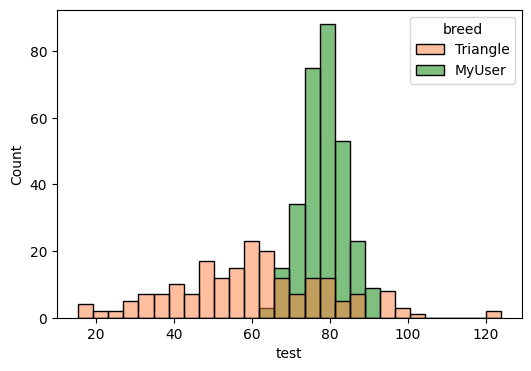

In [2]:
from abses import Actor


class Triangle(Actor):
    color = "#FF7F3E"
    marker = "^"

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.test = self.random.normalvariate(60, 20)


class MyUser(Actor):
    marker = "user"
    color = "green"

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.test = self.random.normalvariate(78, 5)


new_agents = module.random.new(Triangle, size=200, replace=True)
new_users = module.random.new(MyUser, size=300, replace=True)

model.actors.plot.hist("test")

<Axes: xlabel='x', ylabel='y'>

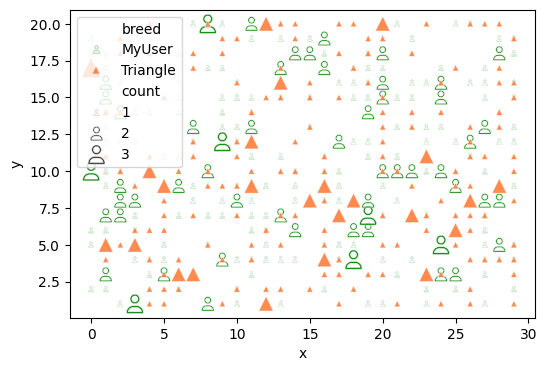

In [3]:
model.actors.plot.positions(
    alpha=0.9, sizes=(20, 200), hue="breed", size="count"
)

## Real-world map

In this section, we will visualize the real-world map of the model.

<Axes: title={'center': 'spatial_ref = 0'}, xlabel='x', ylabel='y'>

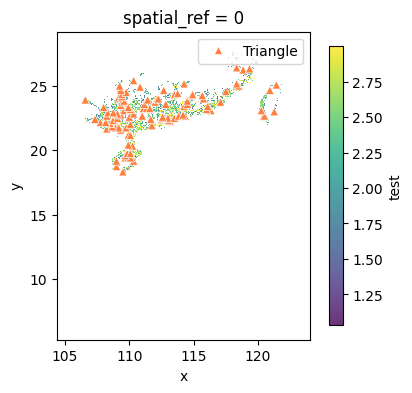

In [5]:
from abses import MainModel
from abses import load_data

sc = MainModel()
cropland = sc.nature.create_module(
    how="from_file",
    raster_file=load_data("farmland.tif"),
    apply_raster=True,
    name="cropland",
    attr_name="test",
)

# adding some Triagle actors and then plotting
actors = cropland.random.new(Triangle, size=100)
cropland.plot.show("test")

## Shapefile Dataset

`ABSESpy` allows user to create Geo- Agents from GeoDataFrame object.

In [6]:
from abses import load_data
import geopandas as gpd

data = gpd.read_file(load_data("YR_cities.zip"))
data.head()

,City_ID,Ratio,area,Shaoefile_,Perfecture,Province_n,geometry
0,100,0.546595,3958.281245,128.0,C100,Henan,"POLYGON ((113.38580 35.47040, 113.39200 35.464..."
1,102,0.385113,15258.027194,170.0,C102,Henan,"POLYGON ((112.03220 35.04700, 112.03260 35.045..."
2,106,0.567869,4273.313471,197.0,C106,Henan,"POLYGON ((115.19540 36.20580, 115.19700 36.203..."
3,107,0.389969,9951.746614,215.0,C107,Henan,"POLYGON ((111.96140 35.07840, 111.96400 35.076..."
4,109,0.601268,8279.739196,290.0,C109,Henan,"POLYGON ((113.67120 35.83740, 113.67660 35.835..."


In [7]:
model2 = MainModel()
cities = model2.agents.new_from_gdf(
    data, unique_id="City_ID", attrs={"area": "area", "Province_n": "province"}
)
cities

<ActorsList: (59)Actor>

<Axes: >

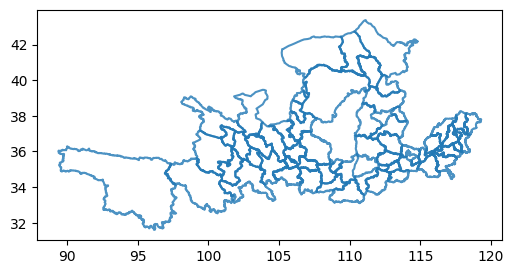

In [8]:
cities.plot.display(boundary=True)